<a href="https://colab.research.google.com/github/jayU000/TensorFlow_2022/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# !pip3 install tensorflow

In [27]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

# import os
# import numpy as np
# from six.moves import urllib
# import tensorflow as tf

# import tensorflow_datasets.public_api as tfds


# (x_train, y_train), (x_test, y_test) = tfds.image_classification.FashionMNIST
# print(x_train.shape, x_test.shape)

# _FASHION_MNIST_CITATION = """\
# @article{DBLP:journals/corr/abs-1708-07747,
#   author    = {Han Xiao and
#                Kashif Rasul and
#                Roland Vollgraf},
#   title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
#                Algorithms},
#   journal   = {CoRR},
#   volume    = {abs/1708.07747},
#   year      = {2017},
#   url       = {http://arxiv.org/abs/1708.07747},
#   archivePrefix = {arXiv},
#   eprint    = {1708.07747},
#   timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
#   biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
#   bibsource = {dblp computer science bibliography, https://dblp.org}
# }
# """

# class FashionMNIST(MNIST):
#     URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"

#     # TODO(afrozm): Try to inherit from MNIST's _info and mutate things as needed.
#     def _info(self):
#         return tfds.core.DatasetInfo(
#             builder=self,
#             description=("Fashion-MNIST is a dataset of Zalando's article images "
#                          "consisting of a training set of 60,000 examples and a "
#                          "test set of 10,000 examples. Each example is a 28x28 "
#                          "grayscale image, associated with a label from 10 "
#                          "classes."),
#             features=tfds.features.FeaturesDict({
#                 "image":
#                     tfds.features.Image(shape=MNIST_IMAGE_SHAPE),
#                 "label":
#                     tfds.features.ClassLabel(names=[
#                         "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
#                         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
#                     ]),
#             }),
#             supervised_keys=("image", "label"),
#             homepage="https://github.com/zalandoresearch/fashion-mnist",
#             citation=_FASHION_MNIST_CITATION,
#         )


(60000, 28, 28) (10000, 28, 28)


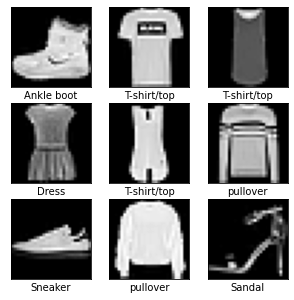

In [28]:
from numpy.random.mtrand import randint
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_size = 9
random_idx = np.random.randint(0, 60000, size = sample_size)

plt.figure(figsize = (5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])

plt.show()


In [29]:
# 0~1범위로 만듦
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [30]:
# 검증 데이터 셋 만들기
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)


# 첫 번째 모델 구성


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

# 입력 데이터의 형태를 명시
first_model.add(Flatten(input_shape = (28, 28)))    # (28, 28) -> ( 28 * 28)
first_model.add(Dense(64, activation = 'relu'))     # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation = 'relu'))     # 64개의 출력을 가지는 Dense층`
first_model.add(Dense(10, activation = 'softmax'))  # 10개의 출력을 가지는 신경망
first_model

# 학습 과정 설정 및 학습하기

In [44]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

first_history = first_model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.1865 - acc: 0.9316 - val_loss: 0.3519 - val_acc: 0.8856
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.1915 - acc: 0.9286 - val_loss: 0.3636 - val_acc: 0.8847
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1812 - acc: 0.9339 - val_loss: 0.3681 - val_acc: 0.8845
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.1820 - acc: 0.9313 - val_loss: 0.3590 - val_acc: 0.8834
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1801 - acc: 0.9331 - val_loss: 0.3696 - val_acc: 0.8867
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1723 - acc: 0.9364 - val_loss: 0.3544 - val_acc: 0.8908
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1721 - acc: 0.9359 - val_loss: 0.3756 - val_acc: 0.8837
Epoch 8/30
329/329 [==============================] - 1s 5ms/step - loss: 0.

#  두 번째 모델 구설하기


In [45]:
second_model = Sequential()

# 입력 데이터의 형대를 꼭 명시
second_model.add(Flatten(input_shape = (28, 28)))   # (28, 28) -> (28 * 28)
# 128개의 출력을 가지는 Dense층 추가
second_model.add(Dense(128, activation='relu'))
# 64개의 출력을 가지는 Dense층 추가
second_model.add(Dense(64, activation='relu'))
# 32개의 출력을 가지는 Dense층 추가
second_model.add(Dense(32, activation='relu'))
# 10개의 출력을 가지는 신경망 추가
second_model.add(Dense(10, activation='softmax'))


second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))


Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.6385 - acc: 0.7799 - val_loss: 0.4601 - val_acc: 0.8399
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4204 - acc: 0.8505 - val_loss: 0.4147 - val_acc: 0.8535
Epoch 3/30
329/329 [==============================] - 2s 8ms/step - loss: 0.3761 - acc: 0.8645 - val_loss: 0.3575 - val_acc: 0.8736
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3487 - acc: 0.8748 - val_loss: 0.3510 - val_acc: 0.8747
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3319 - acc: 0.8790 - val_loss: 0.3288 - val_acc: 0.8848
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3158 - acc: 0.8854 - val_loss: 0.3330 - val_acc: 0.8809
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2965 - acc: 0.8913 - val_loss: 0.3501 - val_acc: 0.8748
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

# 두 모델의 학습 과정 그리기

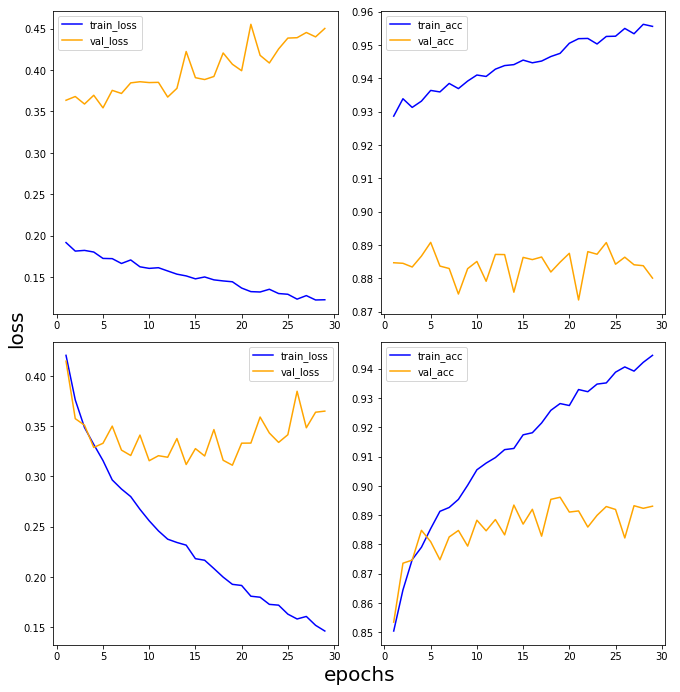

In [48]:
from IPython.core import history
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2, 2, i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]
    temp_history = his_dict_1 if i < 2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:],
                 color='blue', label='train_'+temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:],
                 color='orange', label=val_temp)
    if(i == 1 or i ==3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
    temp_ax.legend()
  ax.set_ylabel('loss', size=20)
  ax.set_xlabel('epochs', size=20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(first_history, second_history, 30)

